# Thème du projet: Etude de la Pollution automobile avec des méthodes de web scraping, régressions et NLP.

## Membre du groupe:

### Ahmed Damou Mohamed El Mostapha
### Ben Amor Mohamed
### Yoda Ismael

N'ayant pas pu trouver un site avec une grande base de donnée à scraper et à analyser à la fois, nous avons choisi de faire de faire le projet en deux parties indépendantes mais l'idée générale reste d'analyser la pollution automobile.

## Partie I: Web scraping et NLP


Contexte: Green NCAP est un organisme indépendant qui éffectue des évaluations environnementales des véhicules neufs. Son objectif principal est de fournir aux consommateurs des informations complètes et objectives sur l'impact environnemental des voitures, en se concentrant sur la pollution de l'air, les émissions de gaz à effet de serre et l'efficacité énergétique.

Notre objectif dans cette partie est d'éffectuer des modèles NLPs pour récuperer les noms de marques et de carburants qui servirons à éffectuer des visualitions. 

URL du site: https://www.greenncap.com/assessments/

# Dictionnaire des variables :

Energy EFFICIENCY: L'Index d'Efficacité Énergétique mesure la consommation d'énergie des véhicules. 

GreenHouse Gaz :  L'Index des Gaz à Effet de Serre mesure les émissions de gaz à effet de 
serre, 

Clean Air : L'Index de l'Air Pur dans la procédure de test de Green NCAP mesure les émissions de polluants des véhicules. 

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import matplotlib.pyplot as plt
import os, requests, bs4, re
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import spacy


Bad key text.latex.preview in file /Users/mac/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/mac/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/mac/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

In [2]:
web_page_url = "https://www.greenncap.com/assessments/"
web_page_response = requests.get(web_page_url)
web_page_response.status_code

200

In [3]:
soup = bs4.BeautifulSoup(web_page_response.content)

## Reccuperation des données sur le site GreenCap

### Les noms de voitures 

In [4]:
###. Car Names 
carNames = soup.find_all(class_="car-name")
carsNamesList=[]

for car in carNames:
    text = car.get_text().strip()
    carsNamesList.append(text)
# print(carsNamesList)

### Les dates

In [5]:
### Dates 
dates=soup.find_all(name="span",class_="date-list")
datesList=[]

for d in dates:
    text = d.get_text().strip()
    datesList.append(text)
# print(datesList)

### Energy EFFICIENCY

In [6]:
### Energy
energyBox=soup.find_all(name="td",class_="index energy")
energy=[]
for c in energyBox:
    value_element = c.find(class_="value").get_text().strip()
    if value_element:
        
        energy.append(value_element)
#print(energy)

### CleanAir

In [7]:
##CleanAir
cleanAirBox=soup.find_all(name="td",class_="index clean")
cleanAir=[]
for c in cleanAirBox:
    value_element = c.find(class_="value").get_text().strip()
    if value_element:
        
        cleanAir.append(value_element)
# print(cleanAir)

### GreenHouse Gas

In [8]:
greenhouseBox=soup.find_all(name="td",class_="index greenhouse")
greenhouse=[]
for c in greenhouseBox:
    value_element = c.find(class_="value").get_text().strip()
    if value_element:
        
        greenhouse.append(value_element)
# print(greenhouse)

### Reccuperation du type de carburan par vehicule avec du NLP 

#### On charge les descriptions complétes de chaque véhicule 

In [9]:
EngineTypeBox=soup.find_all(class_="car-variant")
EngineType=[]
for c in EngineTypeBox:
    value_element = c.get_text().strip()
    if value_element:
    
        EngineType.append(value_element)
        

##### Le code fourni éffectue une classification automatique des types de moteurs à partir de descriptions spécifiques. Il utilise une liste de descriptions de moteurs et des mots clés associés à chaque type de moteur. Le code parcourt chaque description, recherche les mots clés correspondants et attribue le type de moteur approprié. Les résultats de la classification sont stockés dans une liste. Le code utilise également la bibliothèque NLTK pour diviser les descriptions en mots individuels et étiqueter chaque mot avec sa partie du discours. L'objectif principal est de faciliter l'analyse et le traitement des descriptions de moteurs afin d'avoir uniquement le type de carburan utilisé qui nous sera utile plus tard dans le code.

In [10]:
import nltk

# List of engine descriptions
engine_descriptions = EngineType
engine_descriptions = [desc.lower() for desc in engine_descriptions]
engineList = []

# Define engine types and their corresponding keywords
engine_types = {
    'Electric': ['electric', 'kWh'],
    'Hybrid': ['hybrid'],
    'Diesel': ['kW', 'diesel'],
    'Essence': ['petrol'],
    'CNG': ['cng'],
    'Flexifuel': ['flexifuel'],
    'Hydrogen': ['hydrogen']
}

# Function to classify the engine type based on keywords
def classify_engine(description):
    for engine_type, keywords in engine_types.items():
        for keyword in keywords:
            if keyword in description:
                return engine_type
    return 'Unknown'

# Perform engine type classification for each description
classified_engines = [(description, classify_engine(description)) for description in engine_descriptions]

# Print the classified engines
for description, engine_type in classified_engines:
    engineList.append(engine_type)

# NLTK setup
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Tokenize the engine descriptions
tokenized_descriptions = [nltk.word_tokenize(desc) for desc in engine_descriptions]

# Tag the tokens with their part-of-speech
pos_tagged_descriptions = [nltk.pos_tag(tokens) for tokens in tokenized_descriptions]

# Function to extract the engine


[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Recuperation des marques de voitures avec NLP


#### Le code utilise la bibliothèque spacy pour détecter les marques de voitures à partir d'un texte. Il charge un modèle linguistique pré-entraîné et définit une liste de marques de voitures. 

In [11]:
import spacy

car_brands = ['Nissan', 'Renault', 'Ford', 'Volvo', 'VW', 'Hyundai', 'Kia', 'Mercedes', 'BMW', 'Mercedes-Benz',
              'Toyota', 'DS', 'Rover', 'Škoda', 'Land Rover', 'Cupra', 'FIAT', 'SEAT', 'Dacia', 'Lynk & Co', 'Honda',
              'Genesis', 'Subaru', 'Audi', 'Peugeot', 'Lexus', 'MAZDA', 'Citroën', 'MINI', 'Mitsubishi', 'Jeep',
              'Suzuki', 'Opel']


# Load a pre-trained language model
nlp = spacy.load('en_core_web_sm')

# Function to detect car brands from a text
def detect_car_brands(text):
    detected_brands = []
    doc = nlp(text)
    for token in doc:
        for brand in car_brands:
            if brand.lower() in token.text.lower():
                detected_brands.append(brand)
                break
    return list(set(detected_brands))

# Iterate over the list of car names and detect the brands
brands=[]
for car_name in carsNamesList:
    detected_brands = detect_car_brands(car_name)
    if detected_brands:
        brands.append(detected_brands)
    else:
        brands.append('No')
        
brands = [item[0] if isinstance(item, list) else item for item in brands]

#### On crée le data frame qui contiendra toutes les données parsées


In [12]:
df = pd.DataFrame({'CarsName': carsNamesList, 'Date': datesList,'Energy':energy, 'CleanAir': cleanAir,'Greenhouse':greenhouse,'EngineList':engineList,'Brand':brands})
# Conversion des valeurs en numérique
df['Energy'] = df['Energy'].str.split('.').str[0].astype(float)
df['CleanAir'] = df['CleanAir'].str.split('.').str[0].astype(float)
df['Greenhouse'] = df['Greenhouse'].str.split('.').str[0].astype(float)
df


,CarsName,Date,Energy,CleanAir,Greenhouse,EngineList,Brand
0,Nissan Ariya,Apr 2023,9.0,10.0,9.0,Electric,Nissan
1,Renault Austral,Apr 2023,5.0,6.0,3.0,Hybrid,Renault
2,Ford Fiesta,Apr 2023,5.0,3.0,3.0,Hybrid,Ford
3,Volvo XC40,Apr 2023,4.0,6.0,2.0,Essence,Volvo
4,VW T-Roc,Apr 2023,4.0,7.0,2.0,Essence,VW
...,...,...,...,...,...,...,...
96,Audi A4 Avant g-tron,Nov 2020,3.0,4.0,1.0,CNG,Audi
97,Kia Sportage,Nov 2020,3.0,3.0,0.0,Diesel,Kia
98,Mercedes-Benz V-Class,Nov 2020,1.0,7.0,0.0,Diesel,Mercedes
99,Opel/Vauxhall Zafira Life,Nov 2020,1.0,6.0,0.0,Diesel,Opel


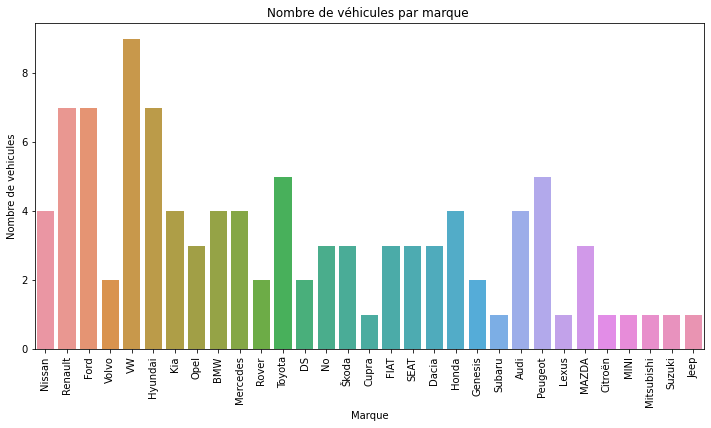

In [13]:
# Plot the count of each category
plt.figure(figsize=(12, 6))
sns.countplot(x=brands)

# Set the plot title and axis labels
plt.title('Nombre de véhicules par marque ')
plt.xlabel('Marque')
plt.ylabel('Nombre de vehicules')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

Commentaire : Ce graphique affiche le taux de de gaz a effet de tout les vehicules de chaque marque.

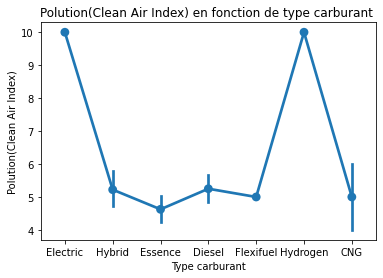

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(x='EngineList', y='CleanAir', data=df)

plt.title('Polution(Clean Air Index) en fonction de type carburant ')
plt.xlabel('Type carburant')
plt.ylabel('Polution(Clean Air Index)')

plt.show()

Commentaire : Ce graphique affiche le taux moyen de pollution de chaque type de carburant.

In [15]:
print(df['Brand'])

0        Nissan
1       Renault
2          Ford
3         Volvo
4            VW
         ...   
96         Audi
97          Kia
98     Mercedes
99         Opel
100          VW
Name: Brand, Length: 101, dtype: object


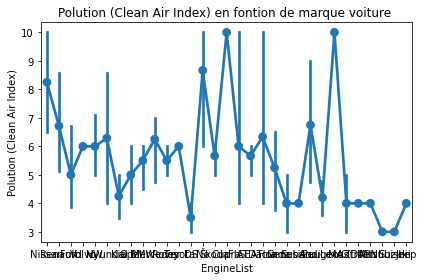

In [16]:
sns.pointplot(x='Brand', y='CleanAir', data=df)

plt.title('Polution (Clean Air Index) en fontion de marque voiture ')
plt.xlabel('EngineList')
plt.ylabel('Polution (Clean Air Index)')

plt.tight_layout()
plt.show()


Commentaire : Ce graphique affiche le taux de pollution moyen de chaque marque.

# Partie II: Prédiction de l'émission du CO2


Contexte: Depuis 2001, l’ADEME(Agence de l'Environnement et de la Maîtrise de l'Energie) acquiert tous les ans ces données auprès de l’Union Technique de l’Automobile du motocycle et du Cycle UTAC (en charge de l’homologation des véhicules avant leur mise en vente) en accord avec le ministère du développement durable.
Pour chaque véhicule les données d’origine (transmises par l’Utac)sont les suivantes :

. les consommations de carburant

. les émissions de dioxyde de carbone (CO2)

. les émissions des polluants de l’air (réglementés dans le cadre de la norme Euro)

. l’ensemble des caractéristiques techniques des véhicules (gammes, marques, modèles, n° de CNIT, type   d’énergie ...)

Notre objectif dans cette partie est de prédire les émissions de dioxyde de carbonne (C02) en utilisant les méthodes de régressions. Pour ce faire, nous avons utiliser toute les variables quantitatives mises à notre disposition dans la base de données cité plus haut.


Source des données: https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/

# Dictionnaire des variables






 puiss_admin_98: la puissance administrative  
 
 puiss_max: la puissance maximale (en kW) 
 
 conso_urb: consommation urbaine de carburant  (en l/100km)
 
 conso_mixte: consommation extra urbaine de carburant  (en l/100km)
 
 co2: l'émission de CO2 (en g/km)   gramme par km
 
 masse_ordma_min: la masse en ordre de marche mini en kg
 
 masse_ordma_max: la masse en ordre de marche maxi en kg
 
 lib_mrq: La marque
 
 cod_cbr: type de carburant
 
 gamme: gamme
 
 
 

# Importation des données brutes et des bibliothèques

In [17]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import validation_curve
import warnings

data = pd.read_csv('data.csv', sep=';', decimal=',', encoding='ISO-8859-1')

data.head()


,co2,puiss_admin_98,puiss_max,conso_urb,conso_mixte,masse_ordma_min,masse_ordma_max,lib_mrq,gamme,cod_cbr
0,182.0,12,147.0,11.3,7.8,1505,1505,ALFA-ROMEO,MOY-SUPER,ES
1,186.0,12,147.0,11.5,8.0,1555,1555,ALFA-ROMEO,MOY-SUPER,ES
2,134.0,7,100.0,6.6,5.1,1565,1565,ALFA-ROMEO,MOY-SUPER,GO
3,134.0,7,100.0,6.6,5.1,1565,1565,ALFA-ROMEO,MOY-SUPER,GO
4,139.0,9,125.0,6.9,5.3,1565,1565,ALFA-ROMEO,MOY-SUPER,GO


Recupération des variables quantitatives

In [18]:
df = data.select_dtypes(include=['int', 'float'])
df.head()

,co2,puiss_admin_98,puiss_max,conso_urb,conso_mixte,masse_ordma_min,masse_ordma_max
0,182.0,12,147.0,11.3,7.8,1505,1505
1,186.0,12,147.0,11.5,8.0,1555,1555
2,134.0,7,100.0,6.6,5.1,1565,1565
3,134.0,7,100.0,6.6,5.1,1565,1565
4,139.0,9,125.0,6.9,5.3,1565,1565


# Analyse exploratoire des données

In [19]:
# Vérifions les colonnes qui comportes des données manquantes dans notre dataset
df.isnull().any()

# Nous constatons que les variables C02, conso_urb et conso_mixte comporte des données manquantes

co2                 True
puiss_admin_98     False
puiss_max          False
conso_urb           True
conso_mixte         True
masse_ordma_min    False
masse_ordma_max    False
dtype: bool

Calculons le pourcentage de valeurs manquantes pour chaque variables de notre dataFrame

In [20]:

missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print(percentage_missing)


co2                0.061769
puiss_admin_98     0.000000
puiss_max          0.000000
conso_urb          0.078119
conso_mixte        0.061769
masse_ordma_min    0.000000
masse_ordma_max    0.000000
dtype: float64


Statistiques descriptive des variables

In [21]:

df.describe()

,co2,puiss_admin_98,puiss_max,conso_urb,conso_mixte,masse_ordma_min,masse_ordma_max
count,55010.000000,55044.000000,55044.000000,55001.000000,55010.000000,55044.000000,55044.000000
mean,201.707035,10.551504,118.984916,9.575919,7.764832,2102.104553,2341.021801
std,33.976278,5.126021,45.417430,2.082148,1.381668,294.731715,424.067895
min,13.000000,1.000000,10.000000,0.000000,0.600000,825.000000,825.000000
25%,193.000000,9.000000,100.000000,8.800000,7.300000,1982.000000,2075.000000
50%,205.000000,10.000000,120.000000,9.400000,7.800000,2076.000000,2355.000000
75%,216.000000,10.000000,120.000000,10.200000,8.300000,2246.000000,2709.000000
max,572.000000,81.000000,585.000000,41.099998,24.500000,2760.000000,3094.000000


Représentation des boxplots des distributions des variables sans les outliers 

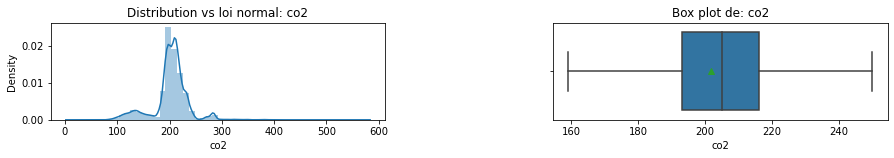

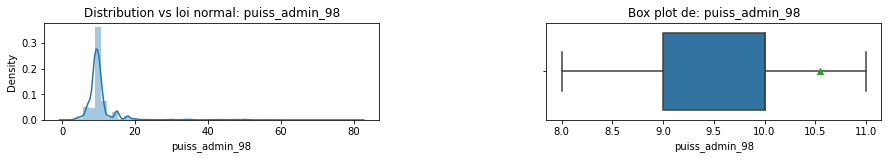

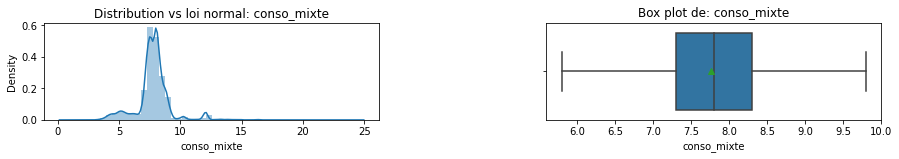

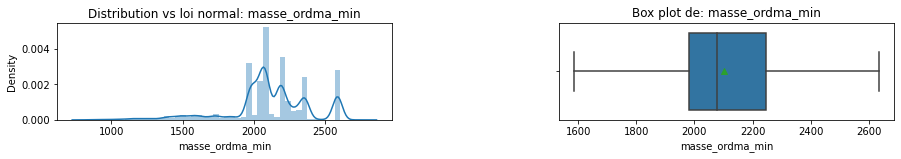

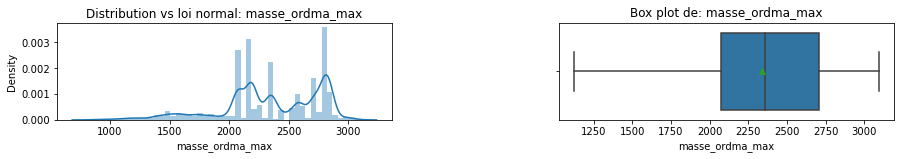

In [50]:

plt.rcParams["figure.figsize"] = [15,5]
grid = plt.GridSpec(2,2 , wspace=0.5, hspace=0.8)
for col in df.select_dtypes( include = ['float', 'int']).columns.to_list():
    plt.figure()
    ax0 = plt.subplot(grid[0, 0:1])
    ax0= sns.distplot(df[col], kde =True)
    ax0.set_title("Distribution vs loi normal: {}" .format(col), fontsize = 12)
    ax1 = plt.subplot(grid[0, 1:])
    ax1= sns.boxplot(data = df,  x = df[col], showfliers =False, showmeans =True)
    ax1.set_title("Box plot de: {}" .format(col), fontsize = 12)
# warnings.filterwarnings("ignore")


COMMENTAIRE: Nous constatons que la distribution des données ne sont pas normales. Aussi plus de la moitiè des véhicules émettent plus de 200 g/km de CO2.

Représentation des boxplots des distributions des variables avec les outliers

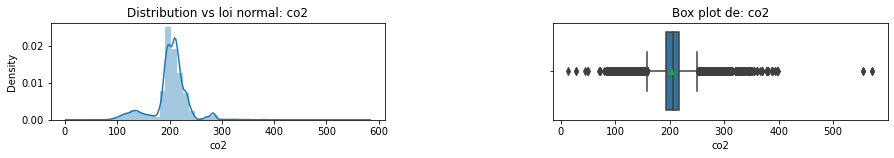

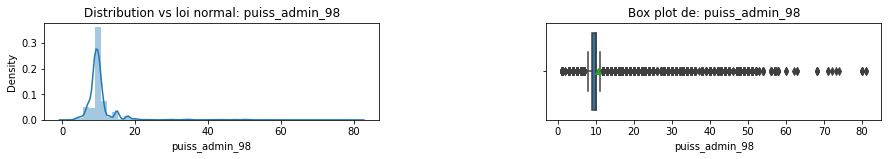

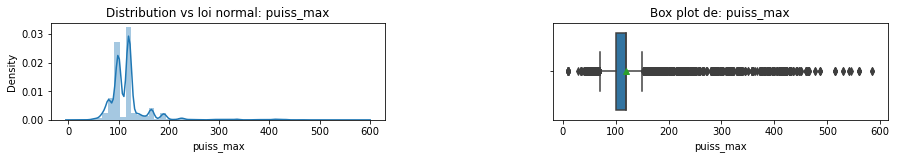

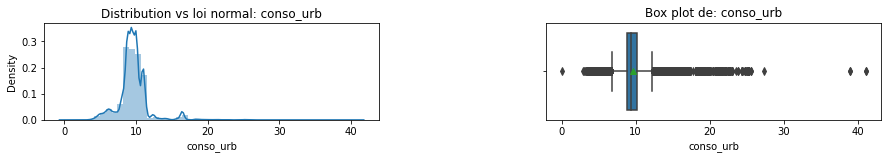

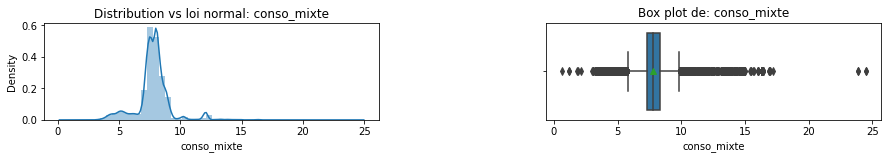

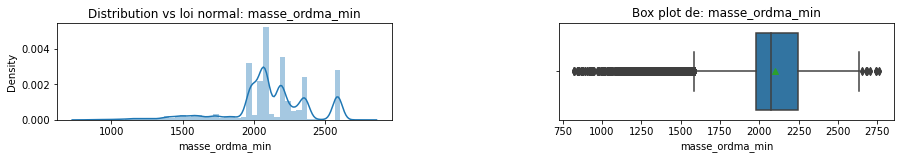

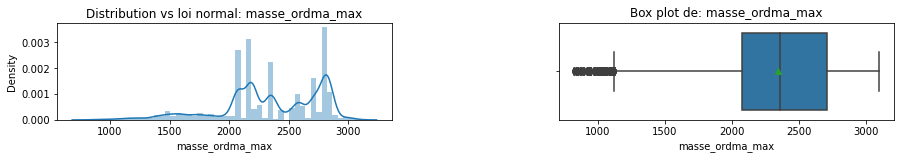

In [23]:
plt.rcParams["figure.figsize"] = [15,5]
grid = plt.GridSpec(2,2 , wspace=0.5, hspace=0.8)
for col in df.select_dtypes( include = ['float', 'int']).columns.to_list():
    plt.figure()
    ax0 = plt.subplot(grid[0, 0:1])
    ax0= sns.distplot(df[col], kde =True)
    ax0.set_title("Distribution vs loi normal: {}" .format(col), fontsize = 12)
    ax1 = plt.subplot(grid[0, 1:])
    ax1= sns.boxplot(data = df,  x = df[col], showfliers =True, showmeans =True)
    ax1.set_title("Box plot de: {}" .format(col), fontsize = 12)
warnings.filterwarnings("ignore")

Etant donnée la présence de valeurs abbérantes dans les colonnes comportants des valeurs manquantes,
nous avons choisi de remplacer ces valeurs manquantes par la médiane étant donné que celui-ci est
moins sensible aux valeurs extrèmes

In [24]:

df['co2'] = df['co2'].fillna(df['co2'].median())

df['conso_urb'] = df['conso_urb'].fillna(df['conso_urb'].median())

df['conso_mixte'] = df['conso_mixte'].fillna(df['conso_mixte'].median())

df.isna().any()
warnings.filterwarnings("ignore")


Repartition de niveau de Co2 en fonction de la marque de véhicules.

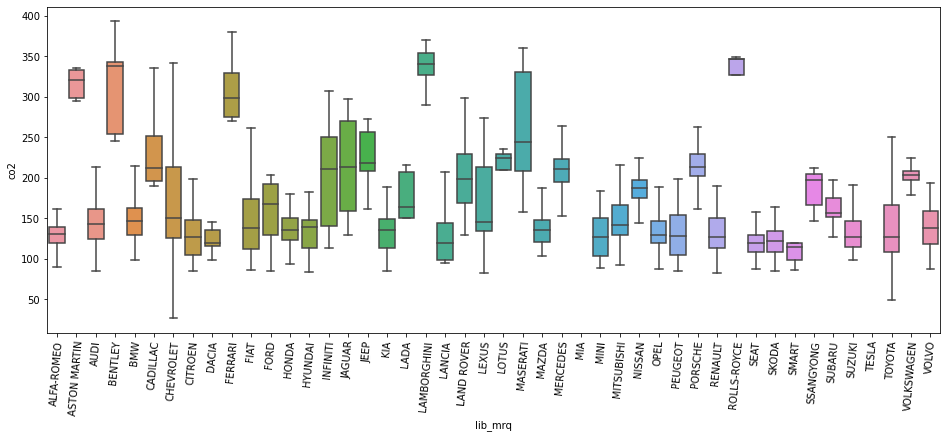

In [25]:
plt.figure(figsize =  (16,6))
sns.boxplot(y = data['co2'], x = data['lib_mrq'], data = data, showfliers = False)
plt.xticks(rotation = 85)
plt.show()

COMMENTAIRE: Globalement, les marques de véhcules comme BENTLEY, FERRARI, LAMBORGHINI, ou encore ROLLS6ROYCCE emettent plus de dioxyde de carbonne (le niveau d'emission est supérieur à la moyenne) contrairement à TESLA ou KIA.

Calculer la moyenne de chaque modalité de la variable qualitative


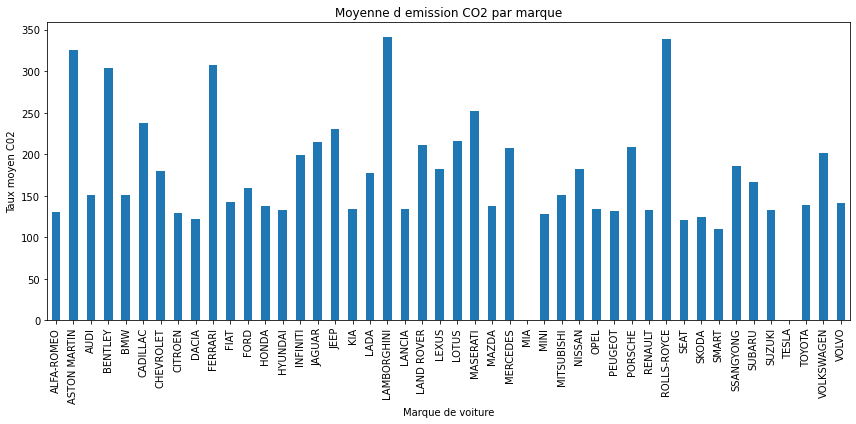

In [26]:

mean_by_modalite = data.groupby('lib_mrq')['co2'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
mean_by_modalite.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Moyenne d emission CO2 par marque')
plt.xlabel('Marque de voiture')
plt.ylabel('Taux moyen C02')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


Emission de Co2 en fonction de la gamme

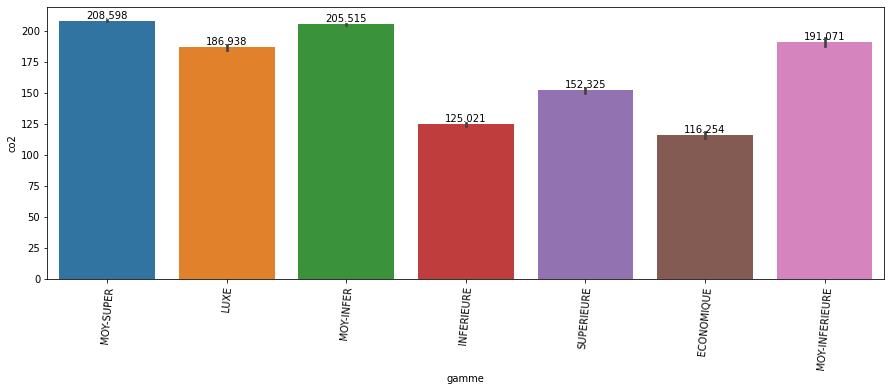

In [27]:
ax = sns.barplot(y = data['co2'], x = data['gamme'], data = data)
plt.xticks(rotation = 85)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

Commentaire: Un premier constat consiste à affirmer que les vehicules de gamme: Luxe; MOY-SUPER et MOY-INFER polluent plus que les gammes Inferieur ou encore economique.

Emission de Co2 en fonction du type de carburant

In [28]:
data["cod_cbr"].value_counts()

cod_cbr
GO       49311
ES        5169
EH         298
GH          81
EL          34
ES/GN       32
GN/ES       32
ES/GP       23
GP/ES       23
GN          21
FE          10
EE           9
GL           1
Name: count, dtype: int64

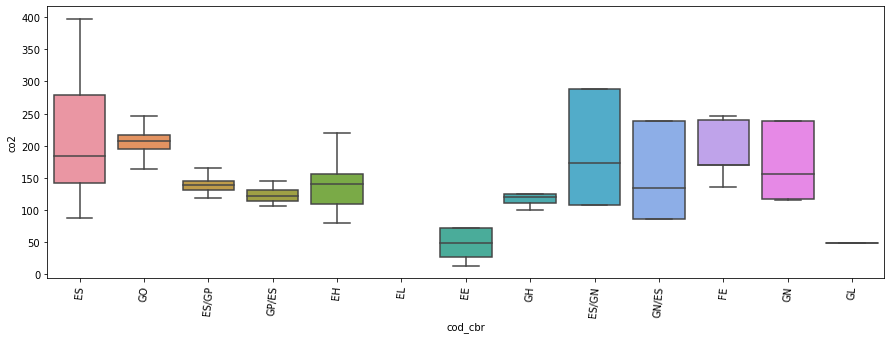

In [29]:
sns.boxplot(y = data['co2'], x = data['cod_cbr'], data = data, showfliers = False)
plt.xticks(rotation = 85)
plt.show()

Commentaire: On remarque que les vehicules roulant à l'essence, Gazole ou du gaz naturel sont plus pollueurs de l'atmosphére que ceux utilisant l'électricité du fait de la combustion de certains componsants chimiques.

 Matrice de corrélation entre les variables

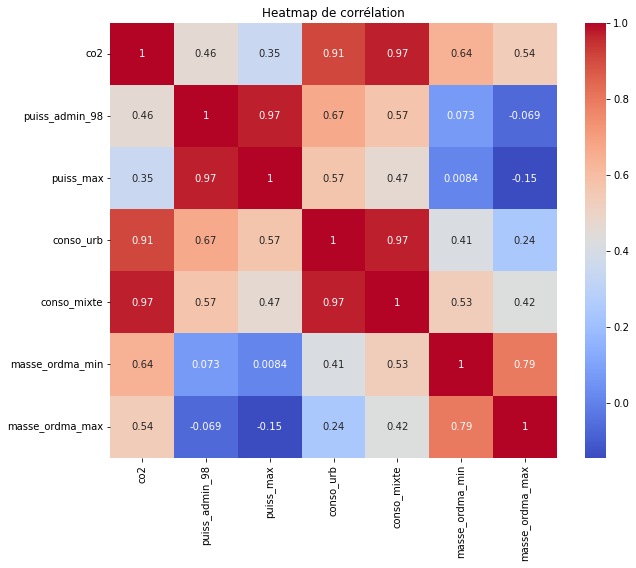

In [30]:

# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Tracer le heatmap de corrélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Heatmap de corrélation')
plt.show()


Commentaire: Nous constatons une forte corrélation entre CO2 et conso_urb, entre CO2 et conso_mixte, entre puiss_admin_98 et puiss_max puis entre conso_urb et conso_mixte. Cette forte corrélation multicolinéarité entre les variables explicative posera un problème de redondance d'information dans  nos modèles. Parmis les couples de variables explicatives corrélés, nous choisisons de supprimer la variable la moins corrélé avec le CO2. Suivant cette logique, nous supprimons les variables Conso_urb et puiss_max.

Nouvelle matrice de corrélation

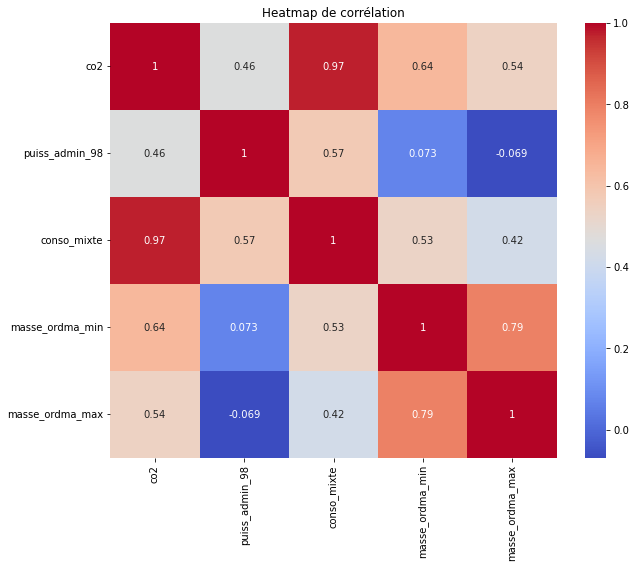

In [31]:
df=df.drop(['conso_urb','puiss_max'],axis=1)

# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Tracer le heatmap de corrélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Heatmap de corrélation')
plt.show()

# Modélisation de l'emission de CO2

# Standardisation des données

In [32]:

df_standart = StandardScaler().fit_transform(df)
df_standart
df_standart.shape

(55044, 5)

# Transformation du array df_standart en dataframe

In [33]:
df_standart= pd.DataFrame(data = df_standart, columns = ['co2', 'puiss_admin_98', 'conso_mixte',
       'masse_ordma_min', 'masse_ordma_max'])
df_standart.head()

,co2,puiss_admin_98,conso_mixte,masse_ordma_min,masse_ordma_max
0,-0.580266,0.282580,0.025446,-2.025944,-1.971452
1,-0.462500,0.282580,0.170244,-1.856297,-1.853545
2,-1.993462,-0.692845,-1.929336,-1.822367,-1.829964
3,-1.993462,-0.692845,-1.929336,-1.822367,-1.829964
4,-1.846254,-0.302675,-1.784537,-1.822367,-1.829964


# Visualisation des données en réduisant les dimensions de notre jeux de données avec une ACP

In [34]:
# Extraction les variables explicatives et à expliquer du modèle du modéle.
Y_standart=df_standart['co2']
X_standart = df_standart.drop(['co2'], axis = 1)
X_standart.head()

,puiss_admin_98,conso_mixte,masse_ordma_min,masse_ordma_max
0,0.282580,0.025446,-2.025944,-1.971452
1,0.282580,0.170244,-1.856297,-1.853545
2,-0.692845,-1.929336,-1.822367,-1.829964
3,-0.692845,-1.929336,-1.822367,-1.829964
4,-0.302675,-1.784537,-1.822367,-1.829964


In [35]:
## Réduction de la dimension de nos variables explicatives par une ACP
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
composante_principal = pca.fit_transform(X_standart)

In [36]:
composante_principal_df = pd.DataFrame(data = composante_principal
             , columns = ['principal component 1', 'principal component 2'])

In [37]:
composante_principal_df.tail()

,principal component 1,principal component 2
55039,-2.598599,0.067430
55040,-1.812764,0.538359
55041,-1.716950,0.840930
55042,-2.233655,0.411269
55043,0.393853,3.152029


In [38]:
print('Explication de la variation par composante  principal: {}'.format(pca.explained_variance_ratio_))

Explication de la variation par composante  principal: [0.56397415 0.32266174]


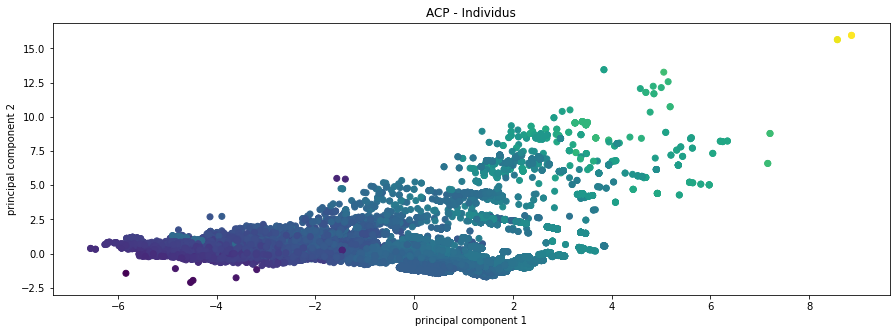

In [39]:
# Créer un DataFrame pour les composantes principales
components_df = pd.DataFrame(data=composante_principal_df, columns=['principal component 1', 'principal component 2'])

# Ajouter la variable cible si applicable
components_df['co2'] = Y_standart

# Visualiser les individus dans l'espace des composantes principales
plt.scatter(components_df['principal component 1'],components_df['principal component 2'], c=components_df['co2'])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('ACP - Individus')
plt.show()

La représentation graphique en 2D nous indique une relation entre nos deux composantes principales et la variable à expliquer semble linéaire. Nous allons à présent Estimer différents modèles de régressions pour ensuite choisir le meilleur en utilisant comme critère de performance, la Root Mean Square Error(RMSE).

# Division des données en données d'entrainement et en données de test. Nous utiliserons 80% pour l'entrainement du modèle et 20% pour le test.

In [40]:

train_X, test_X, train_y, test_y = train_test_split(X_standart, Y_standart, test_size = 0.2, random_state = 20)

# Prévision avec la LinearRegression

In [41]:

# Créer le modèle de régression linéaire
regressor = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
regressor.fit(train_X, train_y)

# Effectuer la prédiction sur les données de test
y_test_pred = regressor.predict(test_X)

# Calculer l'erreur quadratique moyenne
rmse = np.sqrt(metrics.mean_squared_error(test_y, y_test_pred))

print(" Root Mean Squared Error:", rmse)

# Calculer le coefficient de détermination R2
r2 = r2_score(test_y, y_test_pred)

print("R2 :", r2)


 Root Mean Squared Error: 0.169147373731304
R2 : 0.9707575985663509


# Visualisation de la LinearRegression

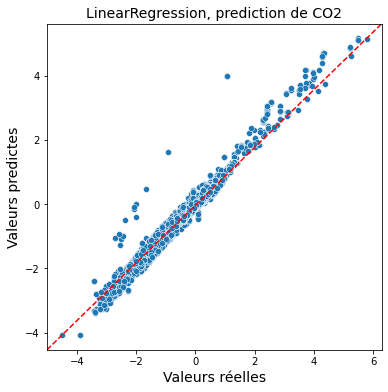

In [42]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = test_y, y = y_test_pred)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("LinearRegression, prediction de CO2", fontsize = 14)
plt.show()

Commentaire: On constate à travers la figure que le modèle s'ajuste bien à nos données avec une variation du CO2 qui est expliquée à plus de 97% par notre modèle.

# Régression avec un modèle Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=42)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
rmse = np.sqrt(metrics.mean_squared_error(test_y, pred_y))

print("Root Mean Squared Error:", rmse)

r2 = r2_score(test_y, pred_y)

print("R2:", r2)


Root Mean Squared Error: 0.17597615608232578
R2: 0.9683488007039391


# Visualisation de la RandomForestRegression

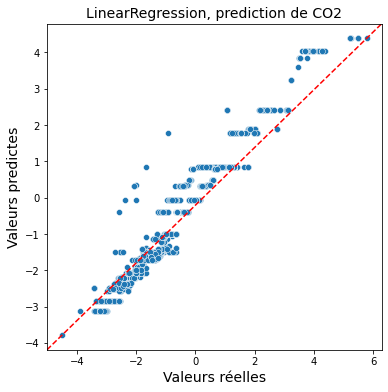

In [44]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = test_y, y = pred_y)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("LinearRegression, prediction de CO2", fontsize = 14)
plt.show()

COMMENTAIRE: On constate à travers la figure que le modèle s'ajuste bien à nos données mais moins bien que la LinearRegression.

In [45]:
#pip install xgboost

# Régression avec l'algorithme XGBoost

In [46]:
# Des trois modèles utilisé, l'algorithme XGBoost Régressor est de loin la plus performante avec
# Le RMSE le plus petit et le R2 le plus grand.

import xgboost 
xgboost = xgboost.XGBRegressor(max_depth=5, subsample=0.7,  
sampling_method='uniform', seed=42, n_estimators=20) 
xgboost.fit(train_X, train_y) 
pred_y = xgboost.predict(test_X) 
rmse = np.sqrt(metrics.mean_squared_error(test_y, pred_y))

print(" Root Mean Squared Error:", rmse)

r2 = r2_score(test_y, pred_y)

print("R2 :", r2)

 Root Mean Squared Error: 0.057253997632623815
R2 : 0.9966496193793302


# Visualisation XGBoostRegression

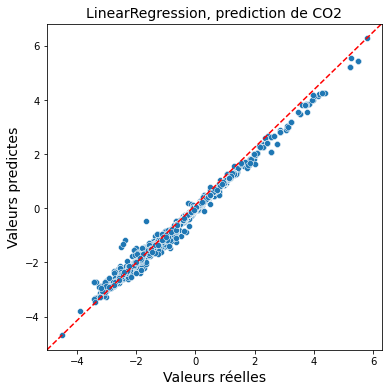

In [47]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = test_y, y = pred_y)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("LinearRegression, prediction de CO2", fontsize = 14)
plt.show()

COMMENTAIRE: On constate à travers la figure que le modèle s'ajuste beaucoup mieux à nos données que les deux précédents avec une variation du CO2 qui est expliquée à plus de 99% par notre modèle.

# Courbe d'apprentissage de l'algorithme XGBoost

In [48]:


def plot_learning_curve(estimator, X, y, param_name, param_range):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range,
                                                 scoring='neg_root_mean_squared_error', cv=None)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel('Value of ' + param_name)
    plt.ylabel('Negative Root Mean Squared Error')
    plt.grid()
    
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    
    plt.plot(param_range, train_scores_mean, 'o-', color='b', label='Training Error')
    plt.plot(param_range, test_scores_mean, 'o-', color='r', label='Validation Error')
    
    plt.legend(loc='best')
    return plt



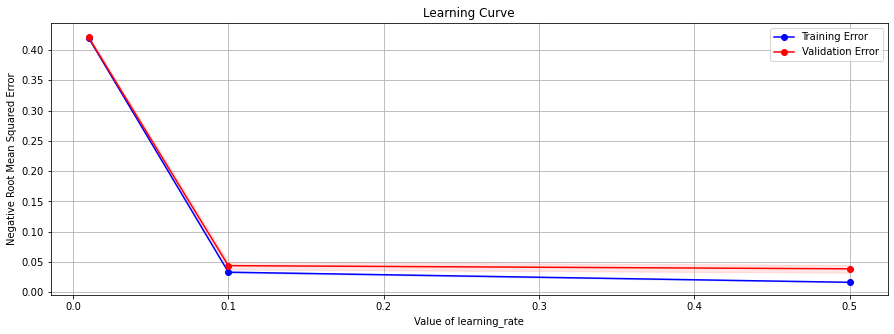

In [49]:
import xgboost
from xgboost import XGBRegressor
estimator = XGBRegressor()  
param_name= 'learning_rate'
param_range= [0.01, 0.1, 0.5]

plot_learning_curve(estimator, train_X, train_y, param_name, param_range)
plt.show()

Commentaire: Nous pouvons constater que notre modèle se généralise assez bien sur nos données de tests.

Conclusion sur nos modèles: Nous constatons au vue des performances de nos modèles que le modèle XGBoost est le meilleure parmis les deux autres(Régression Linéaire et Random Forest)